In [1]:
from math import factorial
import numpy as np

In [2]:
def n_acertos(n, n_max): 
    return 0.5**n * 0.5**(n_max - n) * factorial(n_max) / factorial(n) / factorial(n_max - n)

def n_acertos_1(m, n_max):
    result_tmp = n_acertos(m, n_max)            
    return result_tmp

def n_acertos_2(m, n_max):
    result_tmp = 0
    for i in np.linspace(0, m, m + 1):
        result_tmp += n_acertos(i, n_max) * n_acertos((m - i), (n_max - i))            
    return result_tmp

def n_acertos_3(m, n_max):
    result_tmp = 0
    for i in np.linspace(0, m, m + 1):
        for j in np.linspace(0, m - i, m - i + 1):
            result_tmp += n_acertos(i, n_max) * n_acertos(j, (n_max - i)) * n_acertos((m - i - j), (n_max - i - j))            
    return result_tmp

def chance_n_min(n_min, n_max):
    ms = np.linspace(n_min, n_max, n_max - n_min + 1)
    result1 = 0
    result2 = 0
    result3 = 0
    for m in ms:
        result1 += n_acertos_1(m, n_max)
        result2 += n_acertos_2(m, n_max)
        result3 += n_acertos_3(m, n_max)
    return np.asarray([result1, result2, result3])

Acompanhei uma discussão que surgiu ontem (23/09/2020) no Twitter, por conta de uma postagem da (colocar user) que argumentava sobre a ausência de evidências que embasem astrologia. Naturalmente, nós vemos mais uma vez quem milita pelo fim da pseudociência defendendo a pseudociência de estimação. O texto, ao contrário do que talvez você espere por ler até aqui, não é nem de longe um embasamento filosófico sobre pseudociência ou metodologia científica, mas uma curiosidade minha ao ler o "argumento" de um dos defensores de astrologia que dizia não ser possível um cientista tentar tirar credibilidade da astrologia, sendo que ela sempre funciona. Resolvi desenferrujar meus conhecimentos de probabilidade e estatística pra entender se é possível chegar perto de 100% de acerto usando apenas dados totalmente aleatórios.

## O início da discussão

Deixe-me apresentar como fiz o teste. Vamos supor que você, cético, esteja conversando com um crente em astrologia, que tenta te convencer sobre a boa capacidade de previsão com um teste muito simples: 
1. faça uma lista com várias características suas, cuja resposta é sim ou não;
2. compare com o seu horóscopo;
3. acredite ou não em atrologia baseado no resultado.

Para ilustrar, pense que seu conhecido crente te deu a seguinte lista:

| Característica | Sim | Não |
|:--------------:|:---:|:---:|
| Esfomeado      |  x  |     |
| Impaciente     |     |  x  |
| Ciumento       |     |  x  |
| Estudioso      |     |  x  |
| Emotivo        |  x  |     |

E aí vocês começam a comparar com o que era esperado para o seu signo:

| Característica | Sim | Não | Signo acertou? |
|:--------------:|:---:|:---:|:--------------:|
| Esfomeado      |  x  |     |                |
| Impaciente     |     |  x  |        x       |
| Ciumento       |     |  x  |                |
| Estudioso      |     |  x  |                |
| Emotivo        |  x  |     |                |

Não foi muito bem, apenas 1 acerto, mas "é que não levamos em conta o seu ascendente", disse o crente. Ao fazer isso:

| Característica | Sim | Não | Signo acertou? | Ascendente acertou? |
|:--------------:|:---:|:---:|:--------------:|:-------------------:|
| Esfomeado      |  x  |     |                |                     |
| Impaciente     |     |  x  |       x        |                     |
| Ciumento       |     |  x  |                |           x         |
| Estudioso      |     |  x  |                |           x         |
| Emotivo        |  x  |     |                |           x         |

Bem melhor: com o signo e o ascendente juntos, já foram 4 acertos! E então ele diz: "isso que ainda faltou considerar a sua lua". Fazem isso é voilá:

| Característica | Sim | Não | Signo acertou? | Ascendente acertou? | Lua acertou? |
|:--------------:|:---:|:---:|:--------------:|:-------------------:|:------------:|
| Esfomeado      |  x  |     |                |                     |       x      |
| Impaciente     |     |  x  |       x        |                     |       x      |
| Ciumento       |     |  x  |                |          x          |              |
| Estudioso      |     |  x  |                |          x          |       x      |
| Emotivo        |  x  |     |                |          x          |              |

Não é que seu horóscopo acertou tudo? Então horóscopo funciona? Não é bem assim...

## O modelo

### Viu só!

Então você pensa: "mas não é possível!" E começa a imaginar como fazer um teste mais complicado. Você junta todos os seus colegas de turma da faculdade/escola (por exemplo, você juntou 100 deles). E montou uma lista não com 5, mas com 50 características! Então, você disse: se o horóscopo acertar pelo menos 40 características de 80 dessas pessoas, eu começo a acreditar em astrologia. Parece um teste bem difícil de passar, né? Mas não é.

Vamos falar um pouco de estatística, então. Vamos supor que eu preencha a terceira, a quarta e a quinta colunas de forma **completamente aleatória**, que seria o equivalente a eu inventar absolutamente tudo sobre o seu signo, o seu acendente e a sua lua. Começando só pelo signo, a probablidade de acertar pelo menos $n$ de $N$ características é, sabendo que a probabilidade de acertar uma delas é $1/2$ (sim ou não):
$$
\sum_{m = n}^N \left( \frac12 \right)^m \left( \frac12 \right)^{N-m} \frac{m! (N-m)!}{N!}
$$
eu sei, não é uma fórmula muito simples. Mas ninguém disse que seria.

Ou seja, sendo 50 caracteŕisicas, a probabilidade de acertar pelo menos 40 delas é
$$
\left( \frac12 \right)^{40} \left( \frac12 \right)^{50-40} \frac{40! (50-40)!}{50!} = 0.00119\%.
$$
Em outras palavras, é bem difícil acertar tudo apenas considerado seu signo. "Viu só!", disse o astrólogo. Quase impossível acertar tantas características inventando um signo.



In [3]:
# Probabilidade de acertar pelo menos 40 de 50
chance_n_min(40, 50) * 100

array([1.19306658e-03, 2.62202310e+01, 9.57930161e+01])

### Não tão cedo!

Mas e se levarmos em conta o ascendente e a lua, aquilo que era complicado fica mais ainda. Não vou encher de fórmulas, mas você pode encontrar o código que eu usei para fazer as contas (aqui). Vou me limitar apenas ao resultado: no gráfico abaixo, você pode ver qual as probabilidades de acertar pelo menos $n$ características, usando somente o signo.

In [4]:
ns = np.linspace(0, 50, 51)
probs = []
for n in ns:
    probs.append(100 * chance_n_min(n, 50))
    
probs = np.stack(probs)

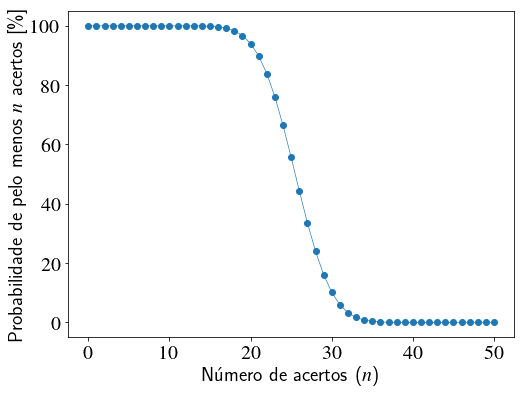

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", **{"family": "sans-serif", "sans-serif": ["Times"]})
rc("text", usetex=True)
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["lines.linewidth"] = 0.65
plt.rcParams["font.size"] = 20
plt.rcParams["legend.fontsize"] = 10

plt.scatter(ns, probs[:,0])
plt.plot(ns, probs[:,0])
plt.ylabel(r'Probabilidade de pelo menos $n$ acertos [\%]')
plt.xlabel(r'Número de acertos ($n$)')
plt.show()

Como esperado, chutando "sim" ou "não", as chances de acertar metade (25) das carcterísticas é bem alto, mas essa probabilidade cai muito se exigirmos um número de acertos maior que 25, e é quase zero para 40 acertos, como já disse anteriormente.

Quando adicionamos o ascendente, veja só o que acontece:

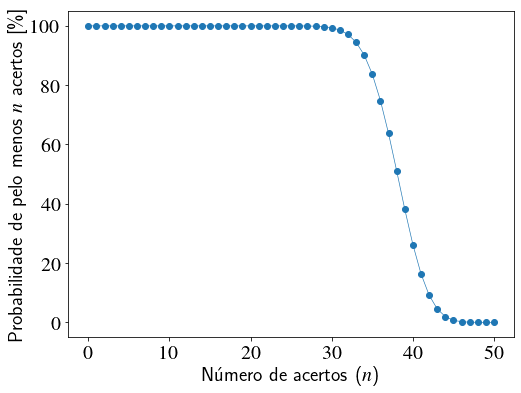

In [17]:
plt.scatter(ns, probs[:,1])
plt.plot(ns, probs[:,1])
plt.ylabel(r'Probabilidade de pelo menos $n$ acertos [\%]')
plt.xlabel(r'Número de acertos ($n$)')
plt.show()

As nossas chances de acertar mais características aumenta. De fato, a probabilidade de acertar pelo menos 40 das caracterísitcas subiu de $0.00119\%$ para $26.22\%$!

E se levarmos a lua em conta? Veja com seus próprios olhos:

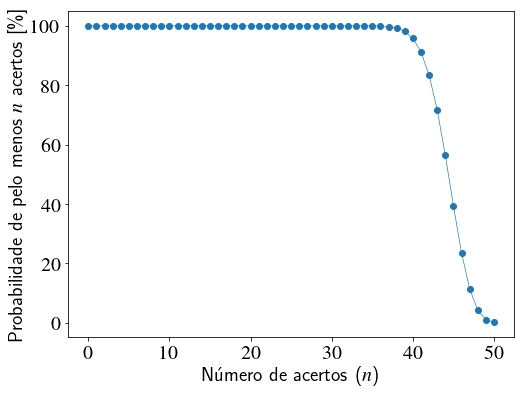

In [18]:
plt.scatter(ns, probs[:,2])
plt.plot(ns, probs[:,2])
plt.ylabel(r'Probabilidade de pelo menos $n$ acertos [\%]')
plt.xlabel(r'Número de acertos ($n$)')
plt.show()

As chances de acertar pelo menos 40 das 50 características subiu de $0.00119\%$ para $95.79\%$!!!! Ou seja, de um grupo de 100 pessoas, é esperado que 95 delas passe no teste.

"Meu horóscopo sempre acerta! Não pode ser coincidência!"

Na verdade, pode. E baseado na ausência de evidências, provavelmente é.

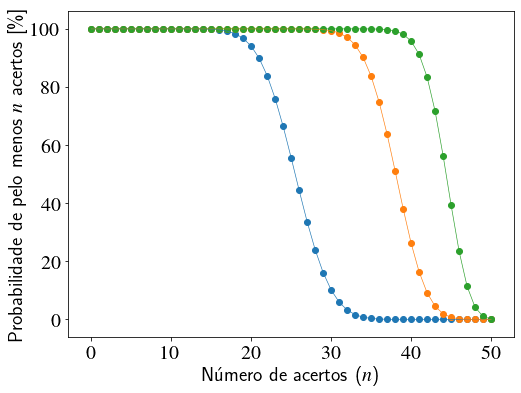

In [19]:
plt.scatter(ns, probs[:,0])
plt.plot(ns, probs[:,0])
plt.scatter(ns, probs[:,1])
plt.plot(ns, probs[:,1])
plt.scatter(ns, probs[:,2])
plt.plot(ns, probs[:,2])
plt.ylabel(r'Probabilidade de pelo menos $n$ acertos [\%]')
plt.xlabel(r'Número de acertos ($n$)')
plt.show()